# Meat consumption worldwide 

## Analysis questions 

Analyze from wikipedia, life expectancy and meat consumption across the world. 

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats 
from sklearn import metrics 

/home/degnaiyu/.local/lib/python3.8/site-packages/pandas/compat/_optional.py:149: UserWarning: Pandas requires version '1.3.1' or newer of 'bottleneck' (version '1.2.1' currently installed).
  warnings.warn(msg, UserWarning)


# Data 

## Life expectancy by country (2019):

In [6]:
lifedata= pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy')

In [7]:
lifedata= lifedata[0]

In [8]:
lifedata.head()

Country Life expectancy at birth                        HALE at birth  \
       Country                      All     M     F  FΔM Δ2000           All   
0          NaN                      NaN   NaN   NaN  NaN   NaN           NaN   
1        Japan                     84.3  81.5  86.9  5.4   3.2          74.1   
2  Switzerland                     83.4  81.8  85.1  3.3   3.7          72.5   
3  South Korea                     83.3  80.3  86.1  5.8   7.1          73.1   
4    Singapore                     83.2  81.0  85.5  4.5   4.8          73.6   

                    ... Life expectancy at age 60                         \
      M     F  FΔM  ...                       All     M     F  FΔM Δ2000   
0   NaN   NaN  NaN  ...                       NaN   NaN   NaN  NaN   NaN   
1  72.6  75.5  2.9  ...                      26.3  23.9  28.6  4.7   2.2   
2  72.2  72.8  0.6  ...                      25.4  24.1  26.6  2.5   2.4   
3  71.3  74.7  3.4  ...                      25.8  23.4  27.9  4.5   5.1   
4  72.4  74.7  2.3  ...                      25.5  23.8  27.2  3.4   4.0   

  HALE at age 60                         
             All     M     F  FΔM Δ2000  
0            NaN   NaN   NaN  NaN   NaN  
1           20.4  18.8  21.8  3.0   1.7  
2           19.5  18.8  20.2  1.4   1.8  
3           19.8  18.2  21.2  3.0   3.9  
4           20.0  18.8  21.0  2.2   3.4  

[5 rows x 21 columns]

In [9]:
lifedata= lifedata.drop(index= [0])  #first row dropped 

In [10]:
birth= lifedata[['Country', 'Life expectancy at birth']]    #life expectancy at birth 
birth.head()

Country Life expectancy at birth                       
       Country                      All     M     F  FΔM Δ2000
1        Japan                     84.3  81.5  86.9  5.4   3.2
2  Switzerland                     83.4  81.8  85.1  3.3   3.7
3  South Korea                     83.3  80.3  86.1  5.8   7.1
4    Singapore                     83.2  81.0  85.5  4.5   4.8
5        Spain                     83.2  80.7  85.7  5.0   4.1

We only need country and life expectancy at birth of all genders:

In [11]:
birth_all= birth.loc[:, [('Country', 'Country'), ('Life expectancy at birth', 'All')]]
birth_all

,Country,Life expectancy at birth
,Country,All
1,Japan,84.3
2,Switzerland,83.4
3,South Korea,83.3
4,Singapore,83.2
5,Spain,83.2
...,...,...
186,Mozambique,58.1
187,Eswatini,57.7
188,Somalia,56.5


In [12]:
birth_all= pd.concat([birth_all['Country'], birth_all['Life expectancy at birth']], axis=1 ) 
birth_all

,Country,All
1,Japan,84.3
2,Switzerland,83.4
3,South Korea,83.3
4,Singapore,83.2
5,Spain,83.2
...,...,...
186,Mozambique,58.1
187,Eswatini,57.7
188,Somalia,56.5
189,Central African Republic,53.1


In [13]:
birth_all= birth_all.set_index('Country')

In [14]:
birth_all

,All
Country,
Japan,84.3
Switzerland,83.4
South Korea,83.3
Singapore,83.2
Spain,83.2
...,...
Mozambique,58.1
Eswatini,57.7
Somalia,56.5


## Meat consumption by country (2017):

In [15]:
meatconsumptiondata= pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_meat_consumption')
meatconsumptiondata= meatconsumptiondata[0]

In [16]:
meatconsumptiondata 

,Country,kg/person (2002)[9][note 1],kg/person (2009)[10],kg/person (2017) [11],kg/person (2017)[12]
0,Albania,38.2,44.1,41.78,NaN
1,Algeria,18.4,19.5,20.32,NaN
2,American Samoa,24.9,26.8,NaN,NaN
3,Angola,25.0,22.4,23.43,NaN
4,Antigua and Barbuda,56.0,84.3,74.56,NaN
...,...,...,...,...,...
180,Venezuela,56.6,76.8,36.12,NaN
181,Vietnam,28.6,49.9,64.68,50.32
182,Yemen,14.7,17.9,12.51,NaN
183,Zambia,11.9,12.3,14.19,NaN


In [17]:
meatdata2017= meatconsumptiondata.loc[:, ['Country', 'kg/person (2017) [11]']]
meatdata2017

,Country,kg/person (2017) [11]
0,Albania,41.78
1,Algeria,20.32
2,American Samoa,NaN
3,Angola,23.43
4,Antigua and Barbuda,74.56
...,...,...
180,Venezuela,36.12
181,Vietnam,64.68
182,Yemen,12.51
183,Zambia,14.19


In [18]:
meatdata2017= meatdata2017.rename(columns= {'kg/person (2017) [11]': 'kg/person'})
meatdata2017= meatdata2017.set_index('Country')
meatdata2017

,kg/person
Country,
Albania,41.78
Algeria,20.32
American Samoa,NaN
Angola,23.43
Antigua and Barbuda,74.56
...,...
Venezuela,36.12
Vietnam,64.68
Yemen,12.51


Now we merge data based on the country: 

In [19]:
concatenated_data= pd.merge(birth_all.reset_index(), meatdata2017.reset_index() ).set_index('Country')
concatenated_data.head() 

,All,kg/person
Country,,
Japan,84.3,49.34
Switzerland,83.4,66.1
South Korea,83.3,55.89
Singapore,83.2,NaN
Spain,83.2,32[15]


In [20]:
concatenated_data= concatenated_data.rename(columns={'All': 'Life expectancy (Age)', 'kg/person': 'Meat consumption (kg/person)'}) #renaming columns 

In [21]:
concatenated_data.head()

,Life expectancy (Age),Meat consumption (kg/person)
Country,,
Japan,84.3,49.34
Switzerland,83.4,66.1
South Korea,83.3,55.89
Singapore,83.2,NaN
Spain,83.2,32[15]


Now we drop rows that have any null values: 

In [22]:
concatenated_data= concatenated_data.dropna()
concatenated_data.head() 

,Life expectancy (Age),Meat consumption (kg/person)
Country,,
Japan,84.3,49.34
Switzerland,83.4,66.1
South Korea,83.3,55.89
Spain,83.2,32[15]
Cyprus,83.1,76.87


In [23]:
# there is some stuff in meat consumption column 
concatenated_data.iloc[:, 1]= concatenated_data.iloc[:, 1].replace('32[15]', '32').astype('float')  

In [24]:
concatenated_data.head()  # now it is ok 

,Life expectancy (Age),Meat consumption (kg/person)
Country,,
Japan,84.3,49.34
Switzerland,83.4,66.10
South Korea,83.3,55.89
Spain,83.2,32.00
Cyprus,83.1,76.87


# Data analysis

## Top 20 countries in terms of life expectancy 

In [25]:
birth_all.head()

,All
Country,
Japan,84.3
Switzerland,83.4
South Korea,83.3
Singapore,83.2
Spain,83.2


In [26]:
birth_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, Japan to Lesotho
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   All     190 non-null    float64
dtypes: float64(1)
memory usage: 3.0+ KB


In [27]:
N=10

top= birth_all.sample(frac=N/190)   #shuffling countries and then get N samples 
top

,All
Country,
Guyana,65.7
Libya,75.8
Burkina Faso,62.7
Bosnia and Herzegovina,76.8
Malawi,65.6
South Korea,83.3
Afghanistan,63.2
Tajikistan,69.5
Finland,81.6


Let's plot scatter plot and compare relative sizes 

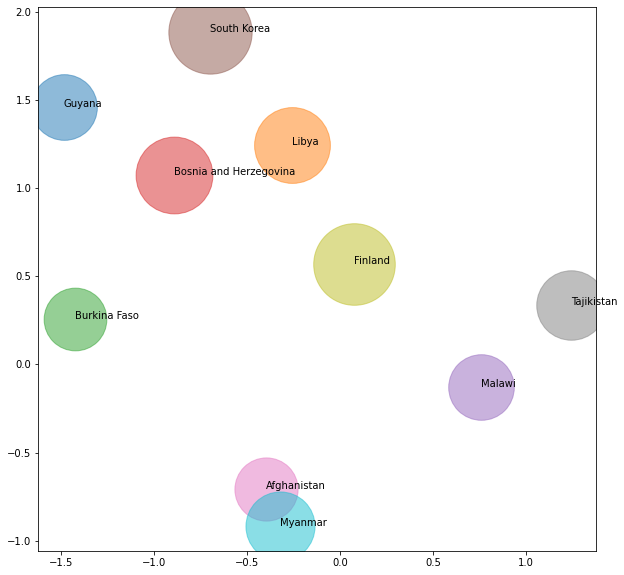

In [28]:
randomgene= np.random.RandomState(300)


topvalues= (np.concatenate(top.values))**2 
topindex= top.index


x= randomgene.randn(N)
y =randomgene.randn(N) 
colors=  np.random.randn(1)**2

plt.figure(figsize=(10,10))

for i, j, index, values  in zip(x, y,  topindex, topvalues ):
    plt.scatter(i, j, s=values , alpha=0.5 )
    plt.annotate(index, (i, j), c='k')



## Exploring relation between meat comsumption and life expectancy 

Constructing models: 

2nd, 10th order polynomial fits

In [29]:
#fitting observations
polynomialfit= np.polyfit(concatenated_data['Meat consumption (kg/person)'], concatenated_data['Life expectancy (Age)'], 2)  #10th polynomial fit 
polynomialfit2= np.polyfit(concatenated_data['Meat consumption (kg/person)'], concatenated_data['Life expectancy (Age)'], 10)  #2nd order polynomial fit

#models 
model= np.poly1d(polynomialfit)    #2nd order model 
model10 = np.poly1d(polynomialfit2) #10th order model 


#fits 
xfit=np.linspace(concatenated_data.iloc[:, 1].min(), concatenated_data.iloc[:, 1].max(), 10000)


yfit= model(xfit)    #2n order
yfit10= model10(xfit)  #10th order

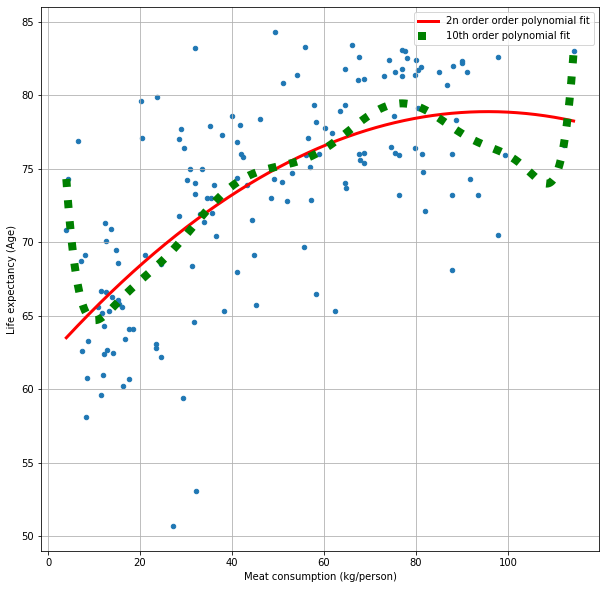

In [30]:
concatenated_data.plot.scatter(x= 'Meat consumption (kg/person)',y= 'Life expectancy (Age)', figsize=(10,10))  #scatter plot of original data points

plt.plot(xfit, yfit,c= 'r', linestyle='-', linewidth=3, label='2n order order polynomial fit')    # 2nd order fit 

plt.plot(xfit, yfit10, c='g', linestyle=':', linewidth= 8, label='10th order polynomial fit') #10th order fit 
         
plt.legend()

plt.grid()


Calculating coefficient of determination ($R^2$)

In [31]:
r2_2nd= metrics.r2_score(concatenated_data['Life expectancy (Age)'], model(concatenated_data['Meat consumption (kg/person)']) )
r2_10th= metrics.r2_score(concatenated_data['Life expectancy (Age)'], model10(concatenated_data['Meat consumption (kg/person)']) )

print(f'(2n order, 10th order) : ({r2_2nd}, {r2_10th})  ' )


(2n order, 10th order) : (0.4574038184871151, 0.5053691690143425)  


Constructing linear fit 

In [32]:
from scipy import stats 
slope, intercept, r, p, std_err= stats.linregress(concatenated_data.iloc[:, 1], concatenated_data.iloc[:, 0])
    
def linearmodel(x, slope, intercept): 
    return slope*x+intercept 

Plot linear fit 

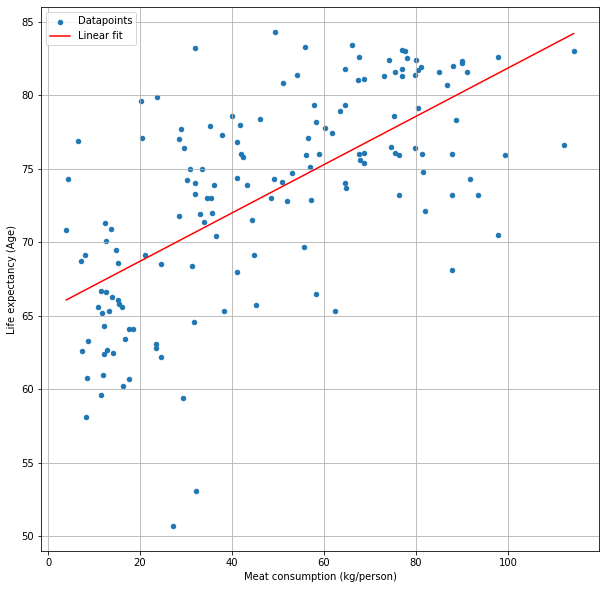

In [33]:
concatenated_data.plot.scatter(x= 'Meat consumption (kg/person)',y= 'Life expectancy (Age)', figsize=(10,10), label='Datapoints')  #scatter plot of original data points 


plt.plot(xfit, linearmodel(xfit, slope, intercept), label='Linear fit', c='r') 
plt.legend()
plt.grid()


# Testing statistical significance

In [34]:
stats.spearmanr(concatenated_data)

SpearmanrResult(correlation=0.6609502386917189, pvalue=1.931512004032311e-20)

In [35]:
stats.pearsonr(x=  concatenated_data['Meat consumption (kg/person)'], y=  concatenated_data['Life expectancy (Age)']  )

(0.6494935845028229, 1.4133779738627134e-19)

It seems like when eating more meat, it is better, since it **increases your life expectancy.**  However, there is possiblity that wealthiness have influenced this result. Country, which eats less meat, tends to be poorer, hence they are more undernourished. Wealthiness (hence undernourishment) may have affected the result. 

# Another research: How about comparing countries with same wealthiness 

Let's compare life expectancy against meat consumption among countries with same relative purchasing power index.  In this way, we can lessen the effect of wealthiness affecting the result. 

# Data

**Data about life expectancy and meat consumption:** 

In [45]:
concatenated_data

,Life expectancy (Age),Meat consumption (kg/person)
Country,,
Japan,84.3,49.34
Switzerland,83.4,66.10
South Korea,83.3,55.89
Spain,83.2,32.00
Cyprus,83.1,76.87
...,...,...
Chad,59.6,11.56
Kiribati,59.4,29.29
Mozambique,58.1,8.28


**Data of purchasing power index:**

In [39]:
df_ppp= pd.read_html('https://www.numbeo.com/quality-of-life/rankings_by_country.jsp?title=2021&displayColumn=1')
df_ppp= df_ppp[1]
df_ppp.head()

,Rank,Country,Purchasing Power Index
0,NaN,Switzerland,110.96
1,NaN,Denmark,94.73
2,NaN,Netherlands,83.89
3,NaN,Finland,89.05
4,NaN,Austria,78.23


Cleaning data of ppp: 

In [40]:
# remove Rank row
df_ppp= df_ppp.drop(columns=['Rank'])
df_ppp 

,Country,Purchasing Power Index
0,Switzerland,110.96
1,Denmark,94.73
2,Netherlands,83.89
3,Finland,89.05
4,Austria,78.23
...,...,...
78,Philippines,19.71
79,Kenya,27.67
80,Bangladesh,24.07
81,Iran,19.00


Merging purchasing power index data with meat consumption and life expectancy data: 

In [57]:
pppmeatlifdat= pd.merge(concatenated_data.reset_index(), df_ppp).set_index('Country')

In [58]:
pppmeatlifdat.head()

,Life expectancy (Age),Meat consumption (kg/person),Purchasing Power Index
Country,,,
Japan,84.3,49.34,76.53
Switzerland,83.4,66.10,110.96
South Korea,83.3,55.89,76.60
Spain,83.2,32.00,62.68
Cyprus,83.1,76.87,52.34


# 2. Data analysis 

Let's check if there is relationship between purchasing power index and meat consumption: 

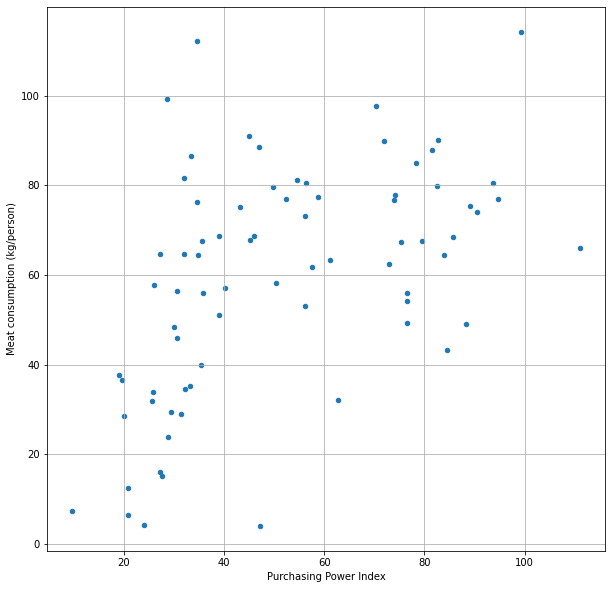

In [95]:
pppmeatlifdat.plot.scatter(x= 'Purchasing Power Index', y= 'Meat consumption (kg/person)', figsize=(10,10))

plt.grid()



Seems like there is a linear relationship when ppp is small, but the effect of ppp is lost when ppp is over 40. 

Let's check if we are right. Applying Pearson correlation test: 

In [99]:
sorted_pppmeatlifdat= pppmeatlifdat.sort_values(by= ['Purchasing Power Index'])     # sorting values 

sorted_pppmeatlifdat

,Life expectancy (Age),Meat consumption (kg/person),Purchasing Power Index
Country,,,
Nigeria,62.6,7.33,9.78
Iran,77.3,37.78,19.00
Philippines,70.4,36.60,19.71
Egypt,71.8,28.51,19.99
Sri Lanka,76.9,6.50,20.77
...,...,...,...
Sweden,82.4,74.04,90.55
Germany,81.7,80.50,93.72
Denmark,81.3,76.87,94.73


In [104]:
countriessmall= sorted_pppmeatlifdat[sorted_pppmeatlifdat.iloc[:, -1]<45]    #extracting countries with ppp smalle than 45 
countriesbig= sorted_pppmeatlifdat[sorted_pppmeatlifdat.iloc[:, -1]>45]  #extracting countries with ppp bigger than 45 

In [103]:
stats.pearsonr(x= countriessmall['Purchasing Power Index'], y=countriessmall['Meat consumption (kg/person)'] )   

(0.636005572436664, 3.063323818858023e-05)

In [105]:
stats.pearsonr(x= countriesbig['Purchasing Power Index'], y=countriesbig['Meat consumption (kg/person)'] )   

(0.21598519943847766, 0.18663726334799163)

After calculating Pearson's tests, we notice that there is a weak but very significant **positive correlation** between PPP and meat consumption for PPP values that is smaller than 45. But the correlation for bigger values of PPP had no significance. 

# Re-exploring the relationship between meat consumption and life expectancy between countries that are equal in wealthiness. 

Since wealthiest countries had no correlation between PPP and meat consumption, we can conclude that wealthiness does not contribute to the life expectancy. 

Let's explore the relationship in wealthiest countries.

In [107]:
countriesbig.head()

,Life expectancy (Age),Meat consumption (kg/person),Purchasing Power Index
Country,,,
Romania,75.6,67.87,45.19
Latvia,75.4,68.72,45.94
Poland,78.3,88.67,47.09
India,70.8,3.97,47.13
Hungary,76.4,79.74,49.81


(0.41247657273463645, 0.009069255141341227)

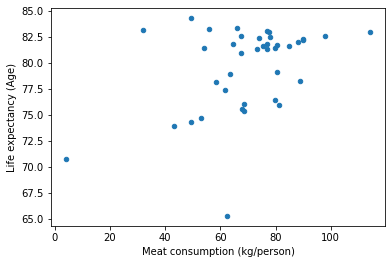

In [110]:
countriesbig.plot.scatter(x= 'Meat consumption (kg/person)', y='Life expectancy (Age)' )
stats.pearsonr(x= countriesbig['Meat consumption (kg/person)'], y=countriesbig['Life expectancy (Age)'])

# Conclusion 

There is no relationship between meat consumption and life expectancy.